<a href="https://colab.research.google.com/github/HANEENA001/my-new-repo/blob/main/Iris_data_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [15]:
dataset = pd.read_csv('/content/drive/MyDrive/colab works/iris.data.csv')

In [17]:
dataset.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [12]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target !=0) * 1


print ("Number of data points ::", X.shape[0])
print("Number of features ::", X.shape[1])

Number of data points :: 150
Number of features :: 2


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
y_pred = svm_classifier.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion_mat)

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

Accuracy: 1.00
Confusion Matrix:
 [[10  0]
 [ 0 20]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



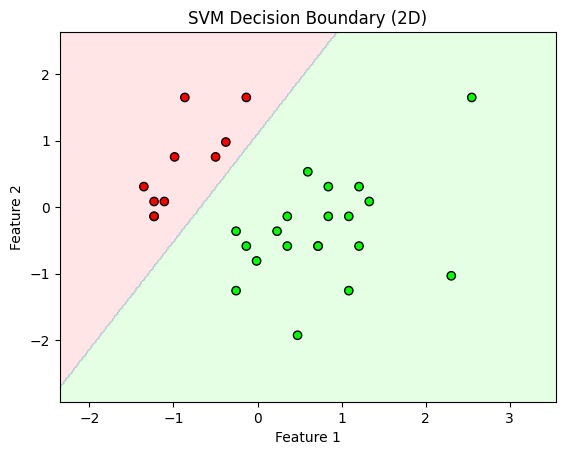

In [25]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Function to visualize decision boundary
def plot_decision_boundary(X, y, classifier, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA']), alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF', '#00FF00']), edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Visualize the decision boundary
plot_decision_boundary(X_test[:, :2], y_test, svm_classifier, 'SVM Decision Boundary (2D)')
